In [4]:
# Practica: Redes booleanas estocasticas
# Nombre: Biologia de sistemas EAFIT
# .rs.restartR()
#######################################################

# descomentar install para poder proceder a cargar los paquetes que hagan falta

#install.packages("BoolNet")
#install.packages("Rlab")
#install.packages("BoolFilter")
#install.packages("devtools")
#install.packages("dplyr")
#install_github("mar-esther23/boolnet-perturb")

#library(devtools)
#install_github("mar-esther23/boolnet-perturb")
#library(BoolNetPerturb)

###########################################################
getwd()
# comenzamos cargando las librerias necesarias

library(Rlab)
library(BoolNet)
library(BoolFilter)
library(devtools)
library(dplyr)
library(BoolNetPerturb)


[1] "/Volumes/alex/biologia_de_sistemas_posgrado/material_redes_booleanas/redes_booleanas_estocasticas_2025-2"

Boolean network with 13 genes

Involved genes:
AG AP1 AP2 AP3 EMF1 FT FUL LFY PI SEP TFL1 UFO WUS

Transition functions:
AG = (!EMF1 & !TFL1 & !AP2) | (!EMF1 & LFY & !AP1) | (!EMF1 & !AP2 & LFY) | (!EMF1 & !TFL1 & LFY & (AG & SEP)) | (!EMF1 & (LFY & WUS))
AP1 = (!AG & !TFL1) | (FT & LFY &!AG) | (FT & !AG & !PI) | (LFY & !AG & !PI) | (FT & !AG & !AP3) | (LFY & !AG & !AP3)
AP2 = !TFL1
AP3 = (LFY & UFO) | (PI & SEP & AP3 & (AG | AP1))
EMF1 = !LFY
FT = !EMF1
FUL = !AP1 & !TFL1
LFY = !EMF1 | !TFL1
PI = (LFY & (AG | AP3)) | (PI & SEP & AP3 & (AG | AP1))
SEP = LFY
TFL1 = !AP1 & (EMF1 & !LFY)
UFO = UFO
WUS = WUS & (!AG | !SEP)

Attractor 1 is a simple attractor consisting of 1 state(s) and has a basin of 2970 state(s):

 |--<------------|
 V               |
 1010011111000   |
 V               |
 |-->------------|


Genes are encoded in the following order: AG AP1 AP2 AP3 EMF1 FT FUL LFY PI SEP TFL1 UFO WUS

Attractor 2 is a simple attractor consisting of 1 state(s) and has a basin of 812 state(s):

 |--<------------|
 V               |
 0110010101000   |
 V               |
 |-->------------|


Genes are encoded in the following order: AG AP1 AP2 AP3 EMF1 FT FUL LFY PI SEP TFL1 UFO WUS

Attractor 3 is a simple attractor consisting of 1 state(s) and has a basin of 94 state(s):

 |--<------------|
 V               |
 1011011111000   |
 V               |
 |-->------------|


Genes are encoded in the following order: AG AP1 AP2 AP3 EMF1 FT FUL LFY PI SEP TFL1 UFO WUS

Attractor 4 is a simple attractor consisting of 1 state(s) and has a basin of 12 state(s):

 |--<------------|
 V               |
 0111010111000   |

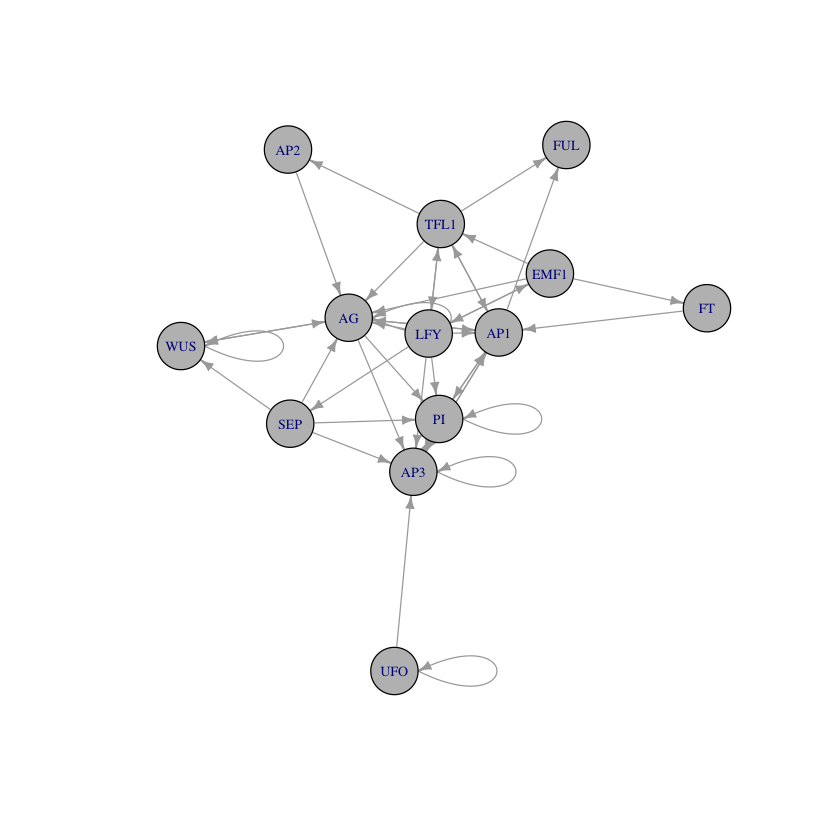

,Attr1.1,Attr2.1,Attr3.1,Attr4.1,Attr5.1,Attr6.1,Attr7.1,Attr8.1,Attr9.1,Attr10.1
AG,1,0,1,0,0,1,0,0,0,0
AP1,0,1,0,1,0,0,1,0,0,0
AP2,1,1,1,1,0,1,1,0,0,0
AP3,0,0,1,1,0,1,1,0,0,0
EMF1,0,0,0,0,1,0,0,1,1,1
FT,1,1,1,1,0,1,1,0,0,0
FUL,1,0,1,0,0,1,0,0,0,0
LFY,1,1,1,1,0,1,1,0,0,0
PI,1,0,1,1,0,1,1,0,0,0
SEP,1,1,1,1,0,1,1,0,0,0


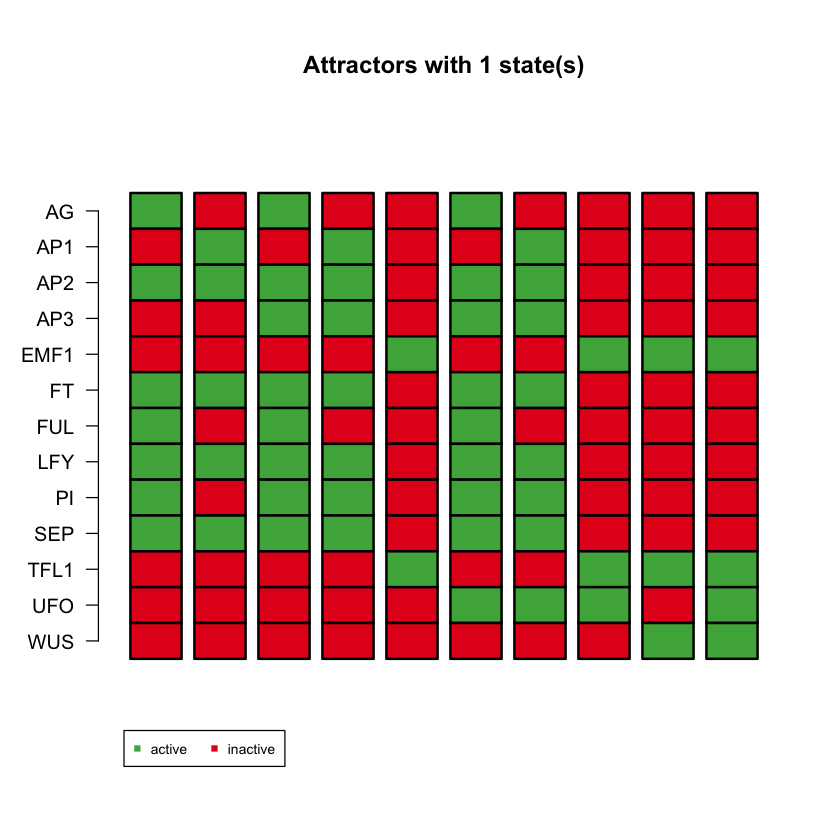

In [7]:
# parte 1 ####################################################

# vamos a cargar la red del articulo "morphogenesis"
## la red de arabidopsis
# la guardamos en el objeto net
net = loadNetwork("/Volumes/16GB/redes_booleanas/ejemplo_class1paper_estocasticas/ATH_flower_cell_fate_determination_net.txt")

# podemos visualizar la red 
plotNetworkWiring(net)
net
# obtener atractores
# la guardamos en el objeto attr

attr = getAttractors(net)
attr

# attr lo imprime feo, nos dice que tenemos 10 actractores como en el estudio
# 6 organos de floración y 4 meristemos de infloresencia 

# mostrar atractores mediante vectores de ceros y unos, es decir "determinista y discreta"
par(mfrow = c(1,1))
plotAttractors(attr)
# como podeis ver, nos salen los 10 atractores tal y como se menciona el articulo

# graficamos los atractores 
# tambien en la consola se nos imprime los estados binarios
# la tabla de vectores de 0 y 1
# hacemos zoom para ver bien los nombres
# si contrastamos con el articulo la grafica obtenida, 
# veremos que hace referencia a la figura 1 (circulos)

# 4 para IM (meristemos de la inflorescencia)
# 6 para los organos florales

# si esto lo comparamos con la forma organizada del articulo, podréis observar que
# que se corresponde al orden de diferencia de los estados de morfogenesis.

# ver como depende la diagonal del ruido (p = 0.0, sin ruido)
# la función epigeneticLandscape nos modela la matrix de Markov
# la cual se alimenta de la red "net"


In [8]:
##################################################################################################

# a continuación sacamos la matriz de Markov

# "p" no hace referencia al ruido (1%= 0.01 en el articulo Tabla1)
# "p" tambien significa la probabilidad

# modelo de Márkov es un tipo especial de proceso estocástico discreto en el que la 
# probabilidad de que ocurra un evento depende solamente del evento inmediatamente anterior.
# es decir un proceso en cadena, donde cada número está conectado directamente 
# no sólo con uno, sino con varios números anteriores

# corremos, tarda unos segundos y obtenemos nuestra matriz de Markov y se guarda en
# el objeto EL

# epigeneticLandscape es la función encargada de generar la matriz de markov

# primero lo hacemos con un ruido "p=0.01"
EL = epigeneticLandscape(net, p = 0.01) #p --> 1% probabilidad de que se aplique el ruido, como en el articulo

# para ver el objeto EL utilizamos "View" y cargará matriz de markov
# veremos en la diagonal numeros muy cercanos a 1
# y en los alrededores número muy pequeños

# ojo! aca nos sale una tabla de 10 x 10, sin embargo en el articulo se quedan solo con 6
# es decir una matriz de Markov de 6 x 6.

# ojo! nunca veremos los mismos números, ya que al ser probabilidades,
# se generan números aleatorios en la matriz.

View(EL)


    [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
   [37] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
   [73] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [109] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [145] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [181] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [217] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [253] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [289] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [325] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [361] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [397] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [433] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

1,2,3,4,5,6,7,8,9,10
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9758321932,1.044887e-02,2.358589e-03,1.089971e-04,8.291615e-04,0.0098807150,1.066451e-04,8.375369e-06,4.221906e-04,4.264552e-06
0.0444290237,9.446036e-01,2.682290e-05,9.189495e-04,2.139213e-05,0.0004490490,9.550733e-03,2.160821e-07,2.160228e-07,2.182048e-09
0.0507432976,4.763437e-03,9.328956e-01,1.596945e-03,6.891706e-07,0.0099357467,6.424629e-05,6.961319e-09,1.793419e-09,1.811535e-11
0.0172183319,3.748513e-02,3.082310e-02,9.044734e-01,9.736973e-09,0.0004852670,9.514733e-03,9.835327e-11,9.736327e-11,9.834673e-13
0.0374559932,9.882342e-03,2.273378e-09,1.108583e-09,9.332360e-01,0.0003783434,9.982165e-05,9.426626e-03,9.425666e-03,9.520874e-05
0.0075061969,9.476900e-05,2.376206e-03,1.057519e-05,8.119317e-06,0.9783578510,1.042907e-02,8.038123e-04,4.133967e-06,4.092627e-04
0.0004201980,8.652808e-03,2.937854e-05,8.974001e-04,2.129382e-07,0.0445080779,9.454706e-01,2.108088e-05,2.150300e-09,2.128797e-07
0.0003783434,9.982164e-05,2.296342e-11,1.119781e-11,9.426626e-03,0.0374559955,9.882343e-03,9.332360e-01,9.520874e-05,9.425666e-03
0.0483229086,1.009015e-04,2.930598e-12,9.703970e-15,9.509910e-03,0.0004881102,1.019207e-06,9.605970e-05,9.320663e-01,9.414811e-03


In [9]:
# Adicionalmente correremos, un objeto llamado ELO con probabilidad de "cero"
# esto es solo para que veáis la diferencia de probabilidad p=0 y p=0.01

ELO= epigeneticLandscape(net, p = 0)
View(ELO)

# veis la diferencia entre ambas matrices: una es: determinista y discreta y el otro estocastico
# así, en la matriz EL0 (discreta) podéis ver y concluir que los atratores
# no pueden desobecer las reglas, es decir por ej: el actrator 1 solo puede ir al atractor 1
# el actractor 2 al 2 y así...(Estado estable estacionario)

# Es por ello que deciamos que el factor de ETA que hace referencia la ruido debe ser: > 0
# que entendemos entonces obedecer o desobecer las reglas?

# de hecho, con lo que hemos ejecutado hasta ahora, ya tenemos la parte
# más compleja


    [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
   [37] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
   [73] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [109] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [145] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [181] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [217] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [253] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [289] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [325] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [361] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [397] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [433] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

1,2,3,4,5,6,7,8,9,10
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0
0,0,0,0,0,1,0,0,0,0
0,0,0,0,0,0,1,0,0,0
0,0,0,0,0,0,0,1,0,0
0,0,0,0,0,0,0,0,1,0


In [10]:
###############################################################################
###############################################################################

# Ahora, si quisieramos preguntarnos cual es la probabilidad de pasar por ej del atractor 5
# al atractor 3, con un valor de p = 0.01 (1%), cual seria esa probabilidad?

EL[5,3] # hacemos un subconjunto de la matriz con [row "5", col "3"] para filtrar los datos que nos interesan
# en este caso tenemos un objeto de dos dimensiones [row, col] y nos extrae el resultado

### el resultado: 2.273378e-09 (tabla)

EL[1,2]
#[1] 0.01044887

[1] 2.273378e-09

[1] 0.01044887

In [11]:
################################################################################

# si quisieramos obtener por ejemplo aquellos valores iguales
# o superiores a 0.01 podriamos implementar este codigo
# es decir, ver la probabilidad de para aquellos atractores de pasar a otro actractor
# si son iguales o superiores al 1% (0.01)

# Inicializamos las variables para almacenar los valores más grandes y sus posiciones
valores_mas_grandes <- numeric(0)
filas_valores <- numeric(0)
columnas_valores <- numeric(0)

# Bucle for para buscar los valores más grandes y las posiciones
for (i in 1:nrow(EL)) {
  for (j in 1:ncol(EL)) {
    valor_actual <- EL[i, j]
    if (valor_actual > 0.01 && valor_actual < 0.9) {
      valores_mas_grandes <- c(valores_mas_grandes, valor_actual)
      filas_valores <- c(filas_valores, i)
      columnas_valores <- c(columnas_valores, j)
    }
  }
}

# Crear un data frame con los resultados
resultados <- data.frame(Fila = filas_valores, Columna = columnas_valores, Valor = valores_mas_grandes)

# Imprimir los resultados
print(resultados)

   Fila Columna      Valor
1     1       2 0.01044887
2     2       1 0.04442902
3     3       1 0.05074330
4     4       1 0.01721833
5     4       2 0.03748513
6     4       3 0.03082310
7     5       1 0.03745599
8     6       7 0.01042907
9     7       6 0.04450808
10    8       6 0.03745600
11    9       1 0.04832291
12   10       6 0.04832291


In [12]:
################################################################################

#  parte 2  #######################################################

# ahora pasamos a los tamaños de las cuencas
# tamaños de las cuencas de atraccion

# recordatorio: una cuenca de atracción es un conjunto de valores de variables que llevan a un sistema a un estado estable, 
# a menudo representado como una forma de embudo o pozo en un diagrama de fase.
# como en la ultima figura del articulo

# esto implica que una cuenca de atracción más grande pueda atraer mas estados iniciales.

# el tamaño de las cuencas de atracción está determinado por la complejidad del sistema y 
# la cantidad de estados estables a los que puede converger a partir de diferentes condiciones iniciales.

# ojo! en los modelos booleanos discretos podemos suponer que el tamaño de las cuencas de
# atracción gobiernan el paso hacia una determinada cuenca.

### sin embargo, ocurrirá lo mismo en las redes booleanas estocasticas?...

# con basinsize podemos estudiar lo anteriormente planteado.

# creamos el objeto "basinsize=cuenca" de atracción, que es una secuencia, en este caso de 1 a 10 x 1.
# por un salto de 1

basinsize = seq(1, 10, by=1)
basinsize

#attr$attractors
# attr$attractors: podemos ver  varios detalles, entre ellos el tamaño de la cuenca, ej:
# [[8]]$basinSize
# [1] 136

# luego hacemos un bucle for (foor loop) para guardar en el objeto basinsize.
# recordemos que el objeto "attr" es una lista donde tenemos los atractores.
# si quisieramos ver mas caracteristicas del objeto attr podemos hacer lo siguiente:

# este for loop nos va sacar el tamaño de las cuencas de atracción.
for (ii in 1:length(basinsize)){
  basinsize[ii] = attr$attractors[[ii]]$basinSize
}
basinsize # ahora entonces con basinsize podemos ver el tamaño de las cuencas de atraccion

# salida: [1] 2970  812   94   12  136 3064  824  136   72   72

#### sin embargo estos numero por si solos no nos dicen mucho

n <- 13 # no.variables en el modelo
basinsize_norm <- basinsize/(2^n) # normalizar (0-100%) tamaños de las cuencas en el relación al
# numero de variables basinsize/(2^n). " variables del sistema 13"
# normalizamos para poder saber quien saber quien tiene el %
# de cuenca más grande

basinsize_norm
# salida:
# [1] 0.362548828 0.099121094 0.011474609 0.001464844 0.016601562 0.374023438 0.100585938 0.016601562
# [9] 0.008789062 0.008789062

# por ej: 2970 que se corresponde a 0.362548828 y es el 2do más grande, 
# significa que:
# tiene 36% posibilidades a partir de todos sus estados iniciales (2 a la n)
# de caer en el atractor 1, en esta cuenca de atracción 

# 0.374023438 (3064) es el más grande y tiene 37% de caer en el atractor 6

[1]  1  2  3  4  5  6  7  8  9 10

[1] 2970  812   94   12  136 3064  824  136   72   72

[1] 0.362548828 0.099121094 0.011474609 0.001464844 0.016601562 0.374023438
 [7] 0.100585938 0.016601562 0.008789062 0.008789062

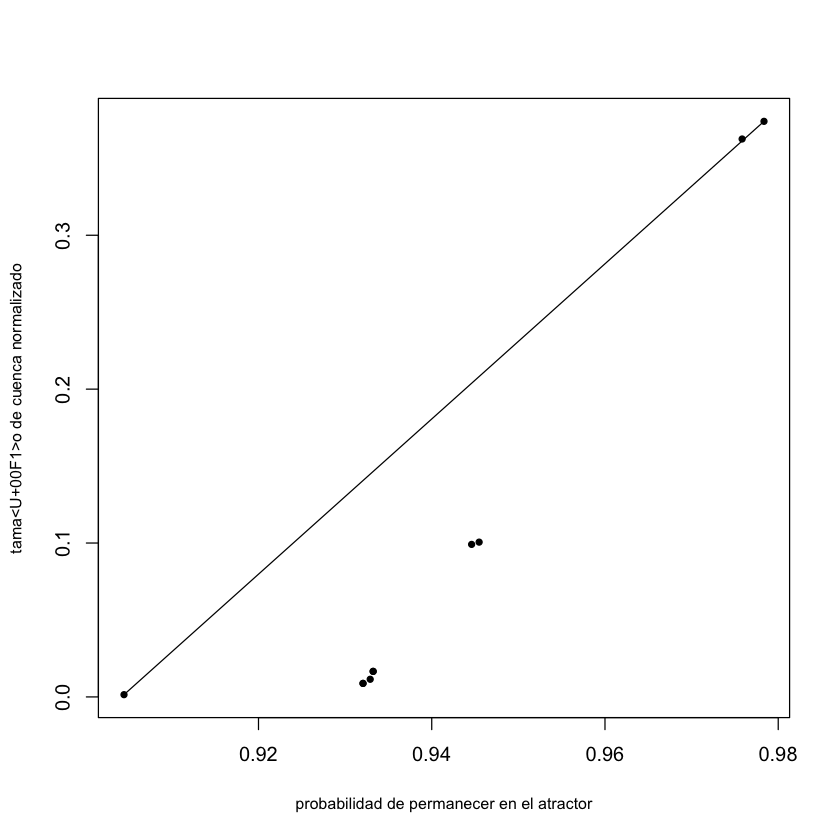

In [13]:
########################################################################################

#### ahora, añadiremos una diagonal (para ver si hay una relacion lineal)

# con este plot vamos a graficar la probabilidad de permanecer en un atractor contra el tamaño de las cuencas
# esta probabilidad la sacamos en este caso de la matriz de markov "EL"
# la función lines nos traza la linea diagonal para ver si hay correlacion
#par(mfrow = c(1,1), din = c(1,1))

plot(diag(as.matrix(EL)), basinsize_norm, pch = 20, cex = 1, 
     xlab = "probabilidad de permanecer en el atractor", 
     ylab = "tamaño de cuenca normalizado",cex.lab = 0.8,las=0.8)
lines(x = c(min(diag(as.matrix(EL))), max(diag(as.matrix(EL)))), # lines nos graficará la diagonal para ver si hay correlación
      y = c(min(basinsize_norm), max(basinsize_norm)))

# que vemos?...
# primero, el grafico lo que nos muestra es la diagonal de los 0.9 en "EL" contra el tamaño de las cuencas normalizado:
# [1] 0.362548828 0.099121094 0.011474609 0.001464844 0.016601562 0.374023438 0.100585938 0.016601562
# [9] 0.008789062 0.008789062

# incialmente, parece que a mayor tamaño normalizado de la cuenca, mayor probabilidad de permanecer en el atractor

# sin embargo, vemos que las distribuciones no se posicionan directamente sobre la diagonal
# "grafica entre tamaños de las cuencas y probabilidad de transiciónn de atractor "

# que vemos?
# R/: aunque aumente el tamaño de la cuenca, no se observa una distribución
# de correlación

# conclusión: no hay correlación directa, aunque parece que si influye.

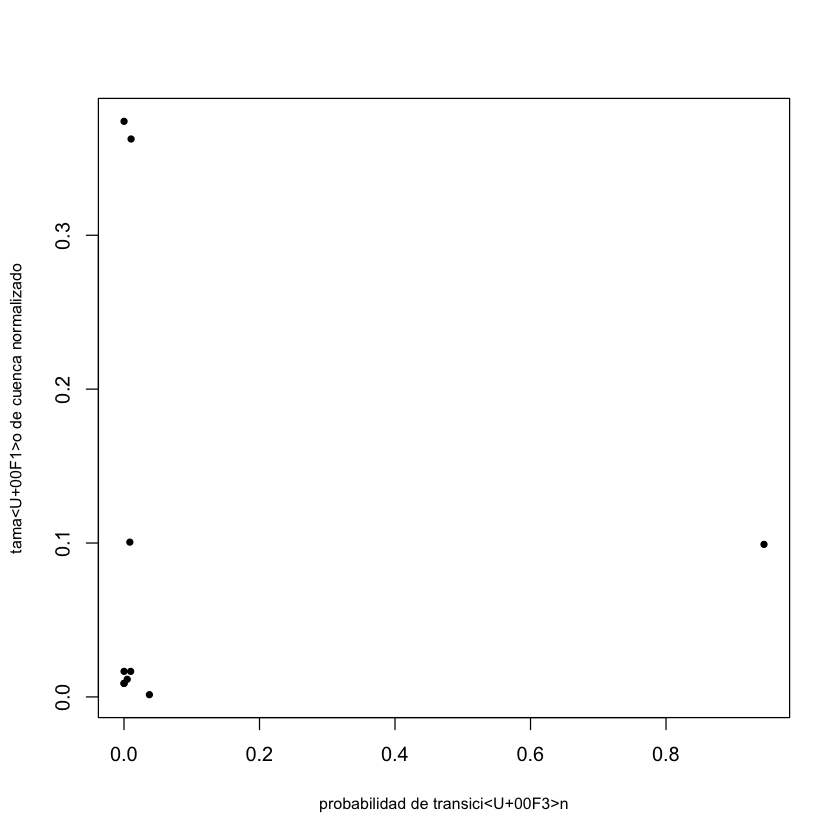

In [14]:
############################################################################

# Adicionalmente a lo anterior, podemos ver la probabilidad de transición de atractor especifico a otro.

# j a atractor 1, j = 1, 2, ..., 10

# Aca lo queremos ver ver es la probabilidad desde el atractor 1 saltar al atractor 2
# y si esto es afectado por el tamaño de la cuenca

# j representa algun atractor, j = 1, 2, ..., 10)
# este plot representa la probalidad transición desde atractor 1 EL[,1]  al atractor 2 EL[,2]

plot(EL[,2], basinsize_norm, pch = 20, cex = 1, 
     xlab = "probabilidad de transición",
     ylab = "tamaño de cuenca normalizado", cex.lab = 0.8)

# vemos que, aunque aumente el tamaño de la cuenca no se sigue una distribución de correlacción

# conclusion: "el efecto de las transiciones no se atribuye directamente al tamaño de las cuencas" (auque si influye)

# "en definitiva: aunque el tamaño de la cuenca importa, no es un determinante directo"



# * IMPORTANTE *
ahora, recuerden estamos estuidando la magnitud del ruido.

entonces, ¿que pasaria si cambiamos el ruido?
¿qué pasaria con las transiciones?

de hecho en relación a la figura 7 del articulo, se menciona que la
unica forma que se pase de inflorescencia a florescencia es aumentando
signifativamente el ruido (p)


'data.frame':	10 obs. of  10 variables:
 $ 1 : num  0.9758 0.0444 0.0507 0.0172 0.0375 ...
 $ 2 : num  0.01045 0.9446 0.00476 0.03749 0.00988 ...
 $ 3 : num  2.36e-03 2.68e-05 9.33e-01 3.08e-02 2.27e-09 ...
 $ 4 : num  1.09e-04 9.19e-04 1.60e-03 9.04e-01 1.11e-09 ...
 $ 5 : num  8.29e-04 2.14e-05 6.89e-07 9.74e-09 9.33e-01 ...
 $ 6 : num  0.009881 0.000449 0.009936 0.000485 0.000378 ...
 $ 7 : num  1.07e-04 9.55e-03 6.42e-05 9.51e-03 9.98e-05 ...
 $ 8 : num  8.38e-06 2.16e-07 6.96e-09 9.84e-11 9.43e-03 ...
 $ 9 : num  4.22e-04 2.16e-07 1.79e-09 9.74e-11 9.43e-03 ...
 $ 10: num  4.26e-06 2.18e-09 1.81e-11 9.83e-13 9.52e-05 ...


1,2,3,4,5,6,7,8,9,10
0.9758321932,1.044887e-02,2.358589e-03,1.089971e-04,8.291615e-04,0.0098807150,1.066451e-04,8.375369e-06,4.221906e-04,4.264552e-06
0.0444290237,9.446036e-01,2.682290e-05,9.189495e-04,2.139213e-05,0.0004490490,9.550733e-03,2.160821e-07,2.160228e-07,2.182048e-09
0.0507432976,4.763437e-03,9.328956e-01,1.596945e-03,6.891706e-07,0.0099357467,6.424629e-05,6.961319e-09,1.793419e-09,1.811535e-11
0.0172183319,3.748513e-02,3.082310e-02,9.044734e-01,9.736973e-09,0.0004852670,9.514733e-03,9.835327e-11,9.736327e-11,9.834673e-13
0.0374559932,9.882342e-03,2.273378e-09,1.108583e-09,9.332360e-01,0.0003783434,9.982165e-05,9.426626e-03,9.425666e-03,9.520874e-05
0.0075061969,9.476900e-05,2.376206e-03,1.057519e-05,8.119317e-06,0.9783578510,1.042907e-02,8.038123e-04,4.133967e-06,4.092627e-04
0.0004201980,8.652808e-03,2.937854e-05,8.974001e-04,2.129382e-07,0.0445080779,9.454706e-01,2.108088e-05,2.150300e-09,2.128797e-07
0.0003783434,9.982164e-05,2.296342e-11,1.119781e-11,9.426626e-03,0.0374559955,9.882343e-03,9.332360e-01,9.520874e-05,9.425666e-03
0.0483229086,1.009015e-04,2.930598e-12,9.703970e-15,9.509910e-03,0.0004881102,1.019207e-06,9.605970e-05,9.320663e-01,9.414811e-03
0.0004881102,1.019207e-06,2.960200e-14,9.801990e-17,9.605970e-05,0.0483229086,1.009015e-04,9.509910e-03,9.414811e-03,9.320663e-01


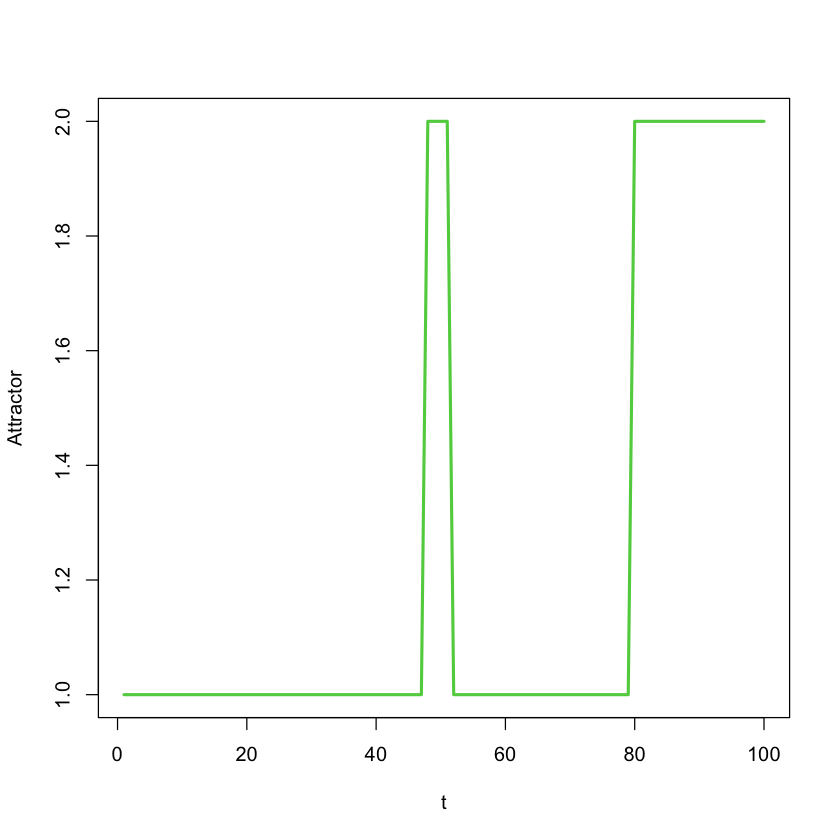

In [16]:
### parte tres #########################################################

# en este ultimo paso se utilizará la matriz de markov "EL" para multiplicarla
# por un vector de estados iniciales distintos que en el script se denomina "v", 
# y se iteran a muchos tiempos (Nsteps)


# si empiezas en atractor 1 despues de 100 pasos cual es la probabilidad de
# permanecer en 1 o pasar a otro actractor.

# entonces, primero convertirmos el objeto "EL" que es un dataframe 
# para comprobarlo podemos hacer lo siguiente:
# str "estructura"

str(EL) # nos dira de que tipo de objeto se trata

## simular una cadena de markov, 100 pasos
# necesitamos convertilo a matriz y guardarlo en
# el objeto P, como se ve a continuación:
P = as.matrix(EL)
P #vemos como queda la matriz
Nsteps <- 100 # numero de pasos le diremos que será 100
# guardamos la distribución inicial en pi0
pi0 = c(1,0,0,0,0,0,0,0,0,0) # distribution de probabilidad inicial: x(0) =
#creamos un vector llamado v
v = vector("numeric", Nsteps) # crear un vector vacio de tamaño.

# creamos un vector llamado r
r = length(pi0) # tamaño para la muestra de la distribución inicial 

# esto lo que hace en esencia es multiplicar un vector de estados iniciales a la matriz
# es ver desde un estado inicial con la matriz de probabilidad que sucede
# a los 100 pasos en este caso.
# y en este caso queremos ver la probabilidad de permanecer en 1, que es donde empezamos:
# pi0 = c(1,0,0,0,0,0,0,0,0,0)

v[1] = 1 #sample(r, 1, prob=pi0) 
# la primer entrada del vector es una muestra de 1,2 r
# la probabilidad de obtener cada uno de estos elementos est? dada por pi0

# corremos nuestro loop para los objetos creados anteriormente
# Una sola realizacion de la cadena
for (i in 2:Nsteps){
  v[i] = sample(r, 1, prob=P[v[i-1],]) # muestrea el nuevo valor: 
  # selecciona el renglon en la matriz de probabilidades que da el vector 
  # de probabilidad de acuerdo con el estado actual
}

# despues de correr mi loope vemos la cadena
# mostrar cadena
matplot(v, type="l", lwd=2.5, col=3,  xlab="t", ylab="Attractor")

# nota: vereis que cada vez que ejecutemos el for anterior, veremos algo diferente
# esto se debe a que se tratan de probabilidades.

# el grafico nos muestra la probabilidad a los 100 pasos del atractor 1 que termine 
# en otro atractor para una sola celula por ej.

# ojo! con este ejemplo, si lo comparamos con EL se oberva que la probabilidad es inferior de permanecer en 1 es inferior,
# esto se debe a que son pocas interaciones. Entre mas iteraciones más parecido a la diagonal EL.

[1] 0.054

[1] 0.988

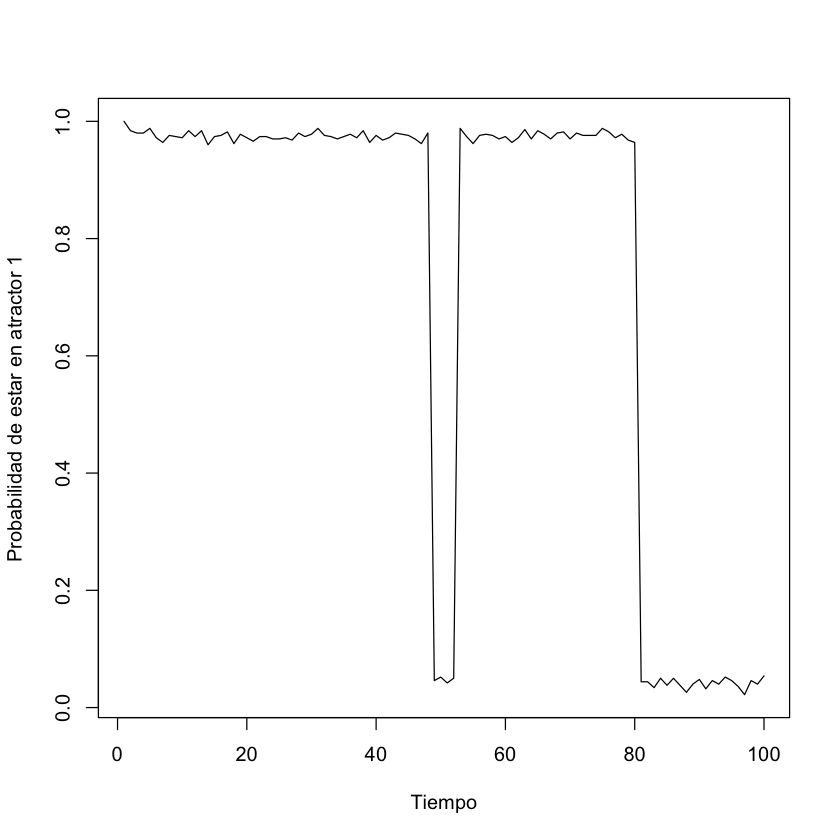

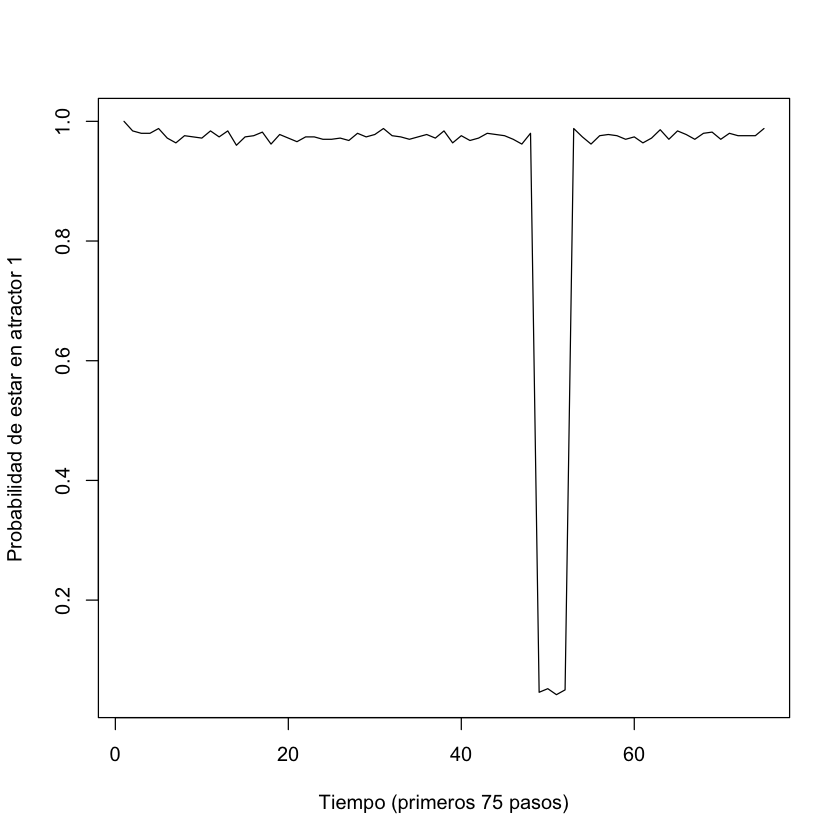

In [27]:
###############################################################################

## ahora, vamos a iterar varias veces, para sacar promedios de 
# las veces de que cada atractor fue visitado en cada paso de tiempo,
# es decir, la probabilidad del atractor i al tiempo N, para i = 1,2,3.
# con las iteraciones lo que hacemos es repetir el proceso para 500 celulas

iterations=500

# matriz para guardar las cadenas 
V = matrix(nrow = iterations, ncol = Nsteps)
V[,1] = rep(1, iterations)

for (jj in 1:iterations){
  for (i in 2:Nsteps){
    V[jj, i] = sample(r, 1, prob=P[v[i-1],]) 
  }
}

# ahora en el plot vamos a ver probabilidades

# Probabilidad de estar en el atractor 1 en el paso 100
mean(V[, 100] == 1)
# probabilidad de estar en el atractor 1 en función del tiempo, a lo largo de 100 pasos
# plot(seq(1,100), colMeans(V[,] == 1), type = "l")
plot(seq(1, Nsteps), colMeans(V == 1), type = "l", xlab="Tiempo", ylab="Probabilidad de estar en atractor 1")

# Probabilidad de estar en el atractor 1 en el paso 75
mean(V[, 75] == 1)
# probabilidad de estar en el atractor 1 en función del tiempo, a lo largo de 75 pasos
# Probabilidad de estar en el atractor 1 a lo largo de 75 pasos
plot(seq(1, 75), colMeans(V[, 1:75] == 1), type = "l", 
     xlab = "Tiempo (primeros 75 pasos)", 
     ylab = "Probabilidad de estar en atractor 1")


[1] 0.018

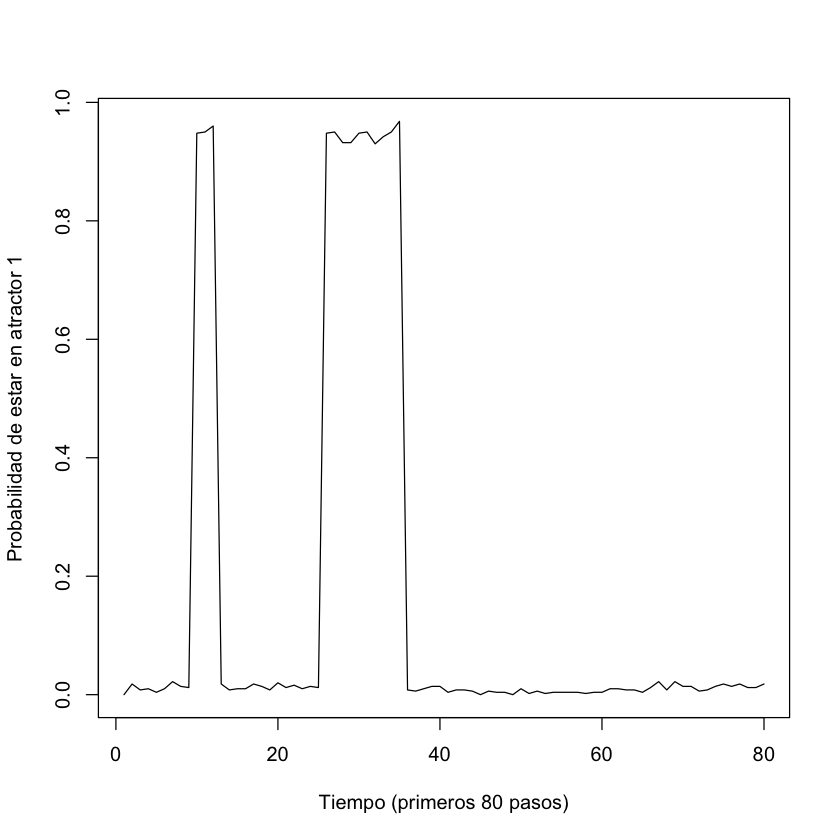

In [12]:
# Probabilidad de estar en el atractor 2 en el paso 80
mean(V[, 80] == 2)
# probabilidad de estar en el atractor 2 en función del tiempo, a lo largo de 80 pasos
# Probabilidad de estar en el atractor 2 a lo largo de 80 pasos
plot(seq(1, 80), colMeans(V[, 1:80] == 2), type = "l", 
     xlab = "Tiempo (primeros 80 pasos)", 
     ylab = "Probabilidad de estar en atractor 1")

[1] 0.052

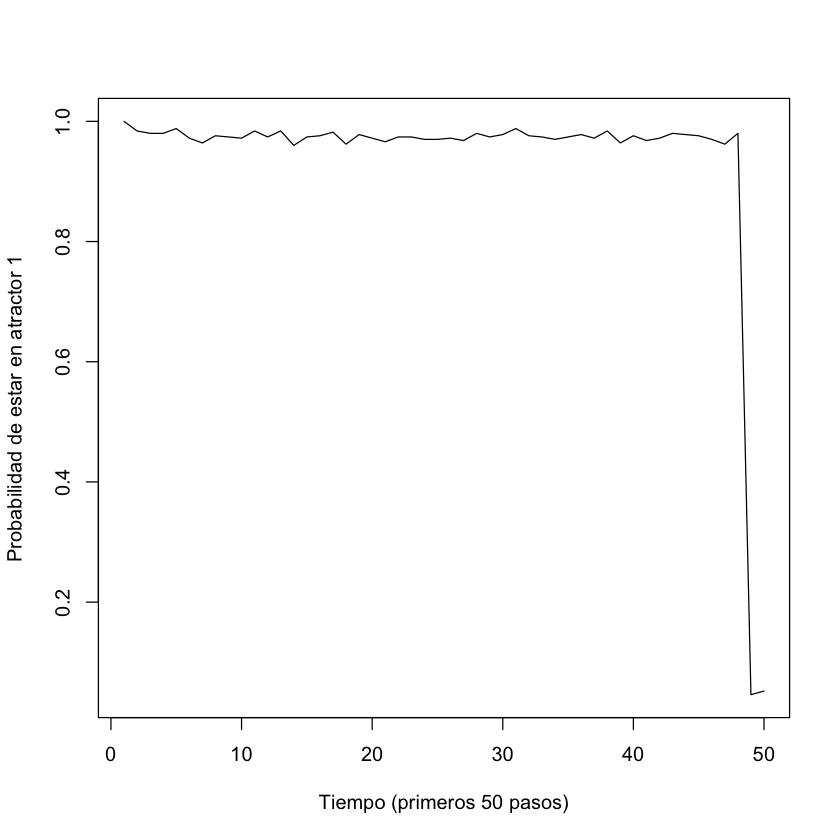

In [28]:
# Probabilidad de estar en el atractor 1 en el paso 50
mean(V[, 50] == 1)
# probabilidad de estar en el atractor 1 en función del tiempo, a lo largo de 50 pasos
# Probabilidad de estar en el atractor 1 a lo largo de 50 pasos
plot(seq(1, 50), colMeans(V[, 1:50] == 1), type = "l", 
     xlab = "Tiempo (primeros 50 pasos)", 
     ylab = "Probabilidad de estar en atractor 1")

[1] 0.936

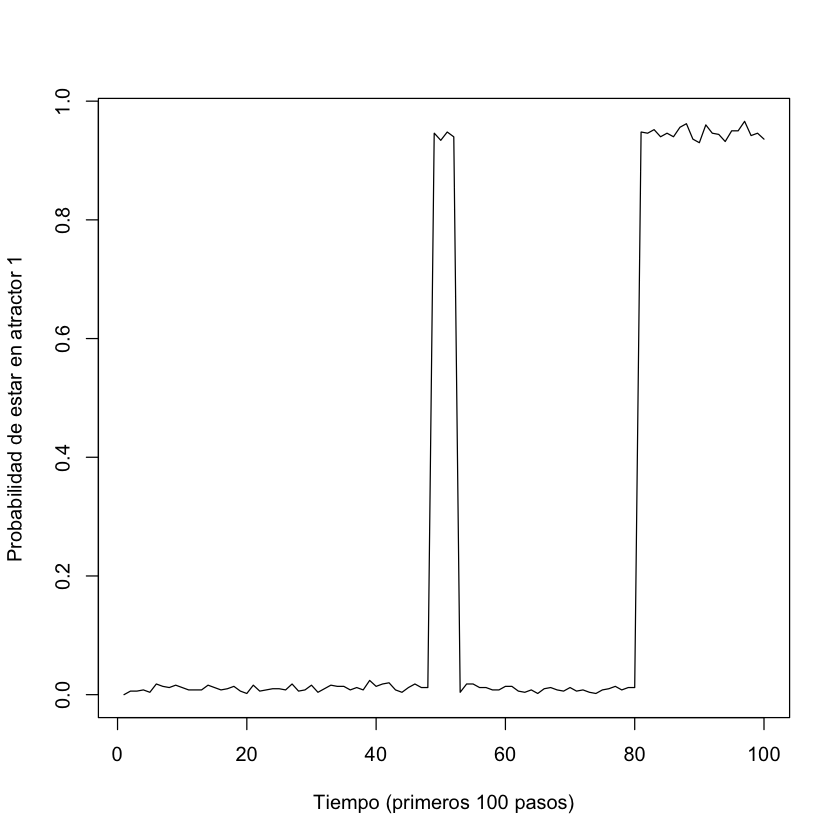

In [29]:
# Probabilidad de estar en el atractor 2 en el paso 100
mean(V[, 100] == 2)
# probabilidad de estar en el atractor 2 en función del tiempo, a lo largo de 100 pasos
# Probabilidad de estar en el atractor 2 a lo largo de 100 pasos
plot(seq(1, 100), colMeans(V[, 1:100] == 2), type = "l", 
     xlab = "Tiempo (primeros 100 pasos)", 
     ylab = "Probabilidad de estar en atractor 1")

[1] 0.012

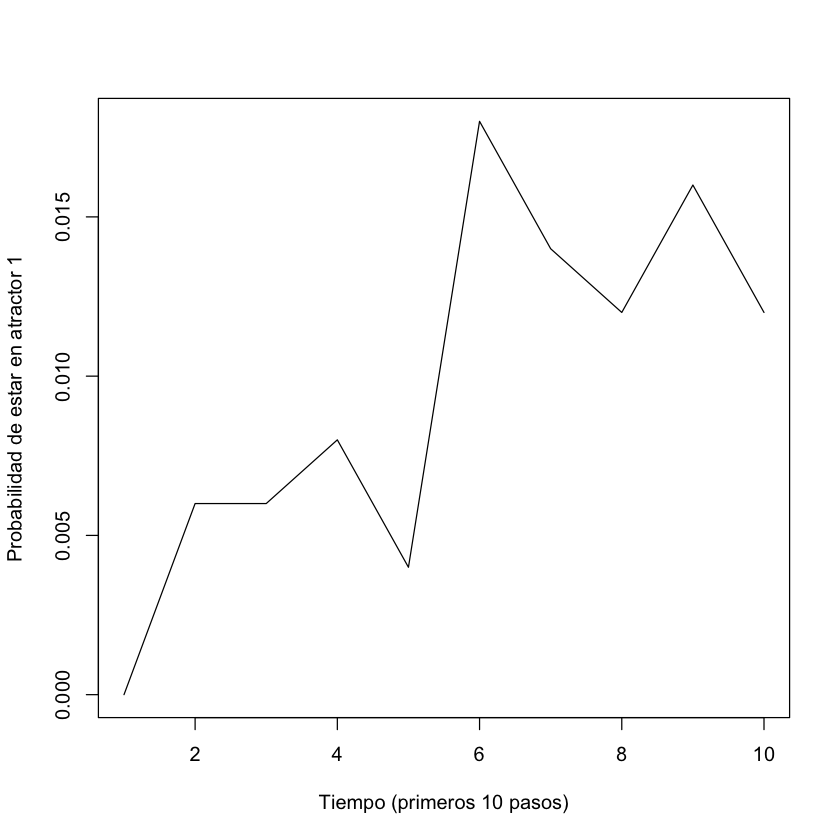

In [30]:
# Probabilidad de estar en el atractor 2 en el paso 10
mean(V[, 10] == 2)
# probabilidad de estar en el atractor 2 en función del tiempo, a lo largo de 10 pasos
# Probabilidad de estar en el atractor 2 a lo largo de 10 pasos
plot(seq(1, 10), colMeans(V[, 1:10] == 2),
    type = "l",
    xlab = "Tiempo (primeros 10 pasos)",
    ylab = "Probabilidad de estar en atractor 1")

En el eje Y veremos entonces la medias de todas las veces que todas las iteracciones pasaron por el atractor 1, en la secuencia de tiempo.

¿A qué se debe ese paso de uno,una caida y luego una subida?
R// Maduración de OF (diferenciación)

A que se deben los que tienen una muy baja probabilidad?
R//Se debe a la inclusión de de los meristemos indiferenciados (IM: IL1, IL2, IL3, IL4) (Recordad el articulo: se necesito de un ruido muy grande para ver las transiciones IM) y en este caso tenemos un "p" pequeña: 0.01
